In [ ]:
# Importing the dependencies:
from google.colab import drive
import pandas as pd

# Loading the data set:
drive.mount("/content/drive")
online_news_popularity = pd.read_csv("/content/drive/MyDrive/OnlineNewsPopularity.csv")

# Displaying the original data set:
online_news_popularity

Mounted at /content/drive


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
# Determining if there are any missing values in the data set:
missing_values = list(online_news_popularity.isnull().sum())
if sum(missing_values) == 0:
  print("OnlineNewsPopularity.csv has no missing values.")
else:
  print("OnlineNewsPopularity.csv has missing values.")

OnlineNewsPopularity.csv has no missing values.


In [ ]:
# Importing the dependencies:
import numpy as np

# Dropping the irrelevant nominal categorical variable "url" from the data set:
online_news_popularity = online_news_popularity.drop(columns = ["url"])

# Dropping the redundant " is_weekend" variable:
online_news_popularity = online_news_popularity.drop(columns = [" is_weekend"])

# Dropping the rows with no recorded word data for the corresponding article:
online_news_popularity.drop(online_news_popularity[online_news_popularity[" n_tokens_content"] == 0].index, inplace = True)

# Dropping the row where " n_unique_tokens" = 701, " n_non_stop_words" = 1,042, and " n_non_stop_unique_tokens" = 650:
online_news_popularity.drop(online_news_popularity[online_news_popularity[" n_non_stop_unique_tokens"] == 650].index, inplace = True)

# Dropping the rows where " num_hrefs" = 304, " num_self_hrefs" = 116, " num_imgs" = 111, " num_imgs" = 128, and " num_videos" = 91:
online_news_popularity.drop(online_news_popularity[online_news_popularity[" num_hrefs"] == 304].index, inplace = True)
online_news_popularity.drop(online_news_popularity[online_news_popularity[" num_self_hrefs"] == 116].index, inplace = True)
online_news_popularity.drop(online_news_popularity[online_news_popularity[" num_imgs"] == 111].index, inplace = True)
online_news_popularity.drop(online_news_popularity[online_news_popularity[" num_imgs"] == 128].index, inplace = True)
online_news_popularity.drop(online_news_popularity[online_news_popularity[" num_videos"] == 91].index, inplace = True)

# Determining the natural logarithm of the target variable " shares" column:
ln_shares = np.log(online_news_popularity.copy())
ln_shares = pd.DataFrame(ln_shares)
ln_shares.rename(columns = {" shares": " ln_shares"}, inplace = True)

# Replacing the target variable " shares" column with its natural logarithm " ln_shares":
online_news_popularity[" shares"] = ln_shares[" ln_shares"]
online_news_popularity.rename(columns = {" shares": " ln_shares"}, inplace = True)

# Displaying the reformed data set:
online_news_popularity

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,ln_shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,6.385194
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.566672
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,7.313220
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090077
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,6.224558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,7.495542
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,7.549609
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,7.549609
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,7.003065


In [ ]:
# Importing the dependencies:
from sklearn.model_selection import train_test_split

# Separating the data set between the feature and target variable data:
X = online_news_popularity.drop(" ln_shares", axis = 1)
y = online_news_popularity[" ln_shares"]

# Splitting the data set into training (60%), validation (20%), and testing (20%) sets:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 100)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 100)

# Dropping the highly skewed keyword variables from the training set:
keyword_features = [" kw_min_min", " kw_max_min", " kw_avg_min", " kw_min_max", " kw_max_max", " kw_avg_max", " kw_min_avg", " kw_max_avg", " kw_avg_avg"]
X_train = X_train.drop(columns = keyword_features)

# Dropping the highly skewed self reference variables from the training set:
self_reference_features = [" self_reference_min_shares", " self_reference_max_shares", " self_reference_avg_sharess"]
X_train = X_train.drop(columns = self_reference_features)

# Dropping the LDA (Latent Dirichlet Allocation) variables from the training set:
LDA_features = [" LDA_00", " LDA_01", " LDA_02", " LDA_03", " LDA_04"]
X_train = X_train.drop(columns = LDA_features)

# Determinining the one-hot encoded categorical variables in the original data set:
categorical_features = [" data_channel_is_lifestyle", " data_channel_is_entertainment", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", " data_channel_is_world",
                        " weekday_is_monday", " weekday_is_tuesday", " weekday_is_wednesday", " weekday_is_thursday", " weekday_is_friday", " weekday_is_saturday", " weekday_is_sunday"]

# Determining the numerical data for the training set:
X_train_numerical = X_train.copy()
X_train_numerical = X_train_numerical.drop(columns = categorical_features)

# Determining the highly correlated numerical features in the training set (|Correlation Coefficient| >= 0.50):
X_train_correlation_matrix = X_train_numerical.corr()
X_train_highly_correlated_features = {}
for i in list(X_train_correlation_matrix):
  for j in list(X_train_correlation_matrix):
    if abs(X_train_correlation_matrix.loc[i][j]) >= 0.50 and abs(X_train_correlation_matrix.loc[i][j]) < 1:
      if X_train_correlation_matrix.loc[i][j] not in list(X_train_highly_correlated_features.values()):
        X_train_highly_correlated_features[(i, j)] = X_train_correlation_matrix.loc[i][j]
for i in list(X_train_highly_correlated_features.keys()):
  print(f"{i}; Correlation Coefficient = {round(X_train_highly_correlated_features[i], 2)}")

(' n_tokens_content', ' n_unique_tokens'); Correlation Coefficient = -0.75
(' n_tokens_content', ' n_non_stop_words'); Correlation Coefficient = 0.6
(' n_tokens_content', ' n_non_stop_unique_tokens'); Correlation Coefficient = -0.6
(' n_unique_tokens', ' n_non_stop_words'); Correlation Coefficient = -0.79
(' n_unique_tokens', ' n_non_stop_unique_tokens'); Correlation Coefficient = 0.88
(' n_non_stop_words', ' n_non_stop_unique_tokens'); Correlation Coefficient = -0.64
(' global_sentiment_polarity', ' global_rate_positive_words'); Correlation Coefficient = 0.54
(' global_sentiment_polarity', ' global_rate_negative_words'); Correlation Coefficient = -0.57
(' global_sentiment_polarity', ' rate_positive_words'); Correlation Coefficient = 0.78
(' global_sentiment_polarity', ' rate_negative_words'); Correlation Coefficient = -0.78
(' global_rate_positive_words', ' rate_positive_words'); Correlation Coefficient = 0.53
(' global_rate_positive_words', ' rate_negative_words'); Correlation Coeffi

In [ ]:
# Dropping the highly correlated features from the training set:
highly_correlated_features = [" n_unique_tokens", " n_non_stop_words", " n_non_stop_unique_tokens", " global_rate_positive_words", " global_rate_negative_words", " rate_positive_words", " rate_negative_words", " min_positive_polarity", " max_positive_polarity",
                              " min_negative_polarity", " max_negative_polarity", " abs_title_subjectivity", " abs_title_sentiment_polarity"]
X_train = X_train.drop(columns = highly_correlated_features)

# Displaying the adjusted training set:
training_set = pd.concat([X_train, y_train], axis = 1)
training_set

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,global_subjectivity,global_sentiment_polarity,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,ln_shares
37232,49.0,13.0,694.0,20.0,2.0,3.0,2.0,4.657061,7.0,0.0,...,0.0,0.0,0.0,0.414731,0.034790,0.279798,-0.336458,0.500000,0.000000,6.768493
20476,328.0,12.0,141.0,5.0,3.0,0.0,2.0,4.390071,10.0,0.0,...,1.0,0.0,0.0,0.579479,0.002741,0.227146,-0.522500,0.000000,0.000000,6.375025
32244,122.0,12.0,606.0,12.0,9.0,3.0,0.0,4.813531,10.0,0.0,...,0.0,0.0,0.0,0.473733,0.062189,0.322359,-0.334722,0.600000,-0.400000,7.863267
16288,416.0,11.0,904.0,5.0,0.0,1.0,0.0,4.350664,10.0,0.0,...,0.0,0.0,0.0,0.458202,0.176008,0.451285,-0.181287,0.000000,0.000000,6.907755
16690,408.0,10.0,600.0,13.0,7.0,1.0,1.0,4.551667,6.0,0.0,...,0.0,0.0,0.0,0.468275,0.082613,0.444841,-0.343910,0.785714,0.228571,7.244228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16419,414.0,11.0,1101.0,15.0,0.0,1.0,0.0,4.811989,10.0,0.0,...,0.0,0.0,0.0,0.395923,0.126246,0.260985,-0.278108,0.066667,0.033333,9.024011
79,730.0,12.0,288.0,5.0,2.0,0.0,0.0,4.381944,6.0,0.0,...,0.0,0.0,0.0,0.449868,0.155556,0.363889,-0.366667,0.000000,0.000000,6.626718
12213,498.0,10.0,380.0,2.0,1.0,1.0,1.0,4.713158,4.0,0.0,...,0.0,0.0,0.0,0.408139,0.116934,0.284007,-0.316667,0.227273,0.068182,6.831954
14255,456.0,9.0,155.0,3.0,1.0,1.0,0.0,4.903226,7.0,0.0,...,0.0,0.0,0.0,0.453636,0.187273,0.422000,-0.050000,0.500000,0.500000,8.630522


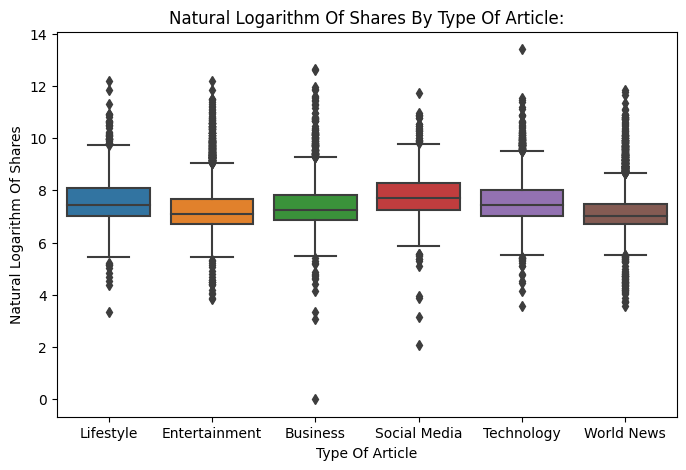

In [ ]:
# Importing the dependencies:
import matplotlib.pyplot as plt
import seaborn as sns

# Determining the data channel feature names:
data_channel_features = [" data_channel_is_lifestyle", " data_channel_is_entertainment", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", " data_channel_is_world"]
data_channel_names = ["Lifestyle", "Entertainment", "Business", "Social Media", "Technology", "World News"]

# Creating a list of the values in the " ln_shares" target variable column:
ln_shares = list(training_set[" ln_shares"])

# Initializing lists of the data channel feature names and the target variable " ln_shares" values for each data channel:
data_channels = []
data_channel_ln_shares = []

# Creating lists for the data channel feature names and the target variable " ln_shares" values for each data channel:
for data_channel_feature in data_channel_features:
  data_channel_values = []
  data_channel_dummy_values = list(training_set[data_channel_feature])
  for i in range(len(data_channel_dummy_values)):
    if data_channel_dummy_values[i] == 1:
      data_channel_values.append(ln_shares[i])
  data_channel_name = []
  for i in range(len(data_channel_values)):
    data_channel_name.append(data_channel_names[data_channel_features.index(data_channel_feature)])
  data_channels = data_channels + data_channel_name
  data_channel_ln_shares = data_channel_ln_shares + data_channel_values

# Converting the lists to a data frame:
data_channel_ln_shares_data = pd.DataFrame(list(zip(data_channels, data_channel_ln_shares)), columns = ["Type Of Article", "Natural Logarithm Of Shares"])

# Displaying side-by-side box plots of the distribution of " ln_shares" with respect to the type of article published:
plt.figure(figsize = (8, 5))
sns.boxplot(x = "Type Of Article", y = "Natural Logarithm Of Shares", data = data_channel_ln_shares_data)
plt.title("Natural Logarithm Of Shares By Type Of Article:")
plt.xlabel("Type Of Article")
plt.ylabel("Natural Logarithm Of Shares")
plt.show()

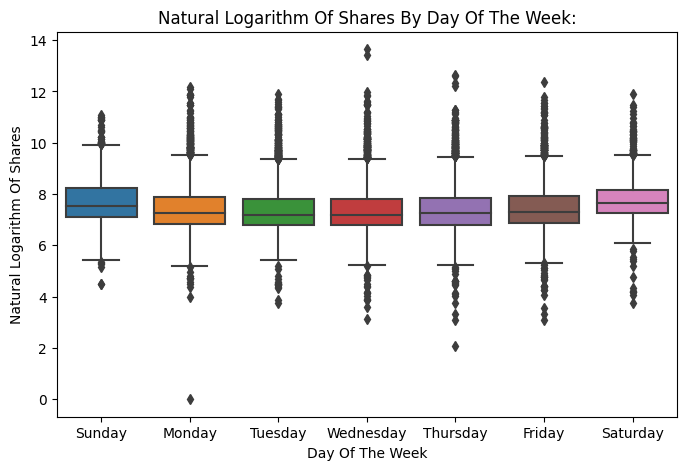

In [ ]:
# Determining the day of week feature names:
weekday_features = [" weekday_is_sunday", " weekday_is_monday", " weekday_is_tuesday", " weekday_is_wednesday", " weekday_is_thursday", " weekday_is_friday", " weekday_is_saturday"]
weekday_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Initializing lists of the day of week feature names and the target variable " ln_shares" values for each day of the week:
weekdays = []
weekday_ln_shares = []

# Creating lists for the day of week feature names and the target variable " ln_shares" values for each day of the week:
for weekday_feature in weekday_features:
  weekday_values = []
  weekday_dummy_values = list(training_set[weekday_feature])
  for i in range(len(weekday_dummy_values)):
    if weekday_dummy_values[i] == 1:
      weekday_values.append(ln_shares[i])
  weekday_name = []
  for i in range(len(weekday_values)):
    weekday_name.append(weekday_names[weekday_features.index(weekday_feature)])
  weekdays = weekdays + weekday_name
  weekday_ln_shares = weekday_ln_shares + weekday_values

# Converting the lists to a data frame:
weekday_ln_shares_data = pd.DataFrame(list(zip(weekdays, weekday_ln_shares)), columns = ["Day Of The Week", "Natural Logarithm Of Shares"])

# Displaying side-by-side box plots of the distribution of " ln_shares" with respect to the day of the week:
plt.figure(figsize = (8, 5))
sns.boxplot(x = "Day Of The Week", y = "Natural Logarithm Of Shares", data = weekday_ln_shares_data)
plt.title("Natural Logarithm Of Shares By Day Of The Week:")
plt.xlabel("Day Of The Week")
plt.ylabel("Natural Logarithm Of Shares")
plt.show()

<Figure size 640x480 with 0 Axes>

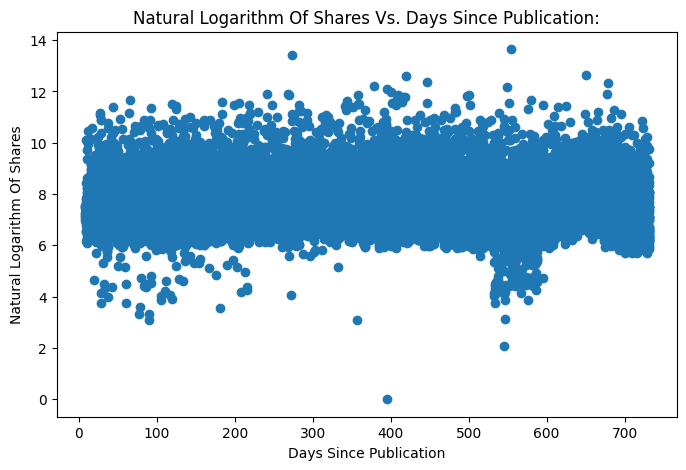

In [ ]:
# Creating a list of values in the " timedelta" column:
timedelta = list(training_set[" timedelta"])

# Displaying the distribution of " ln_shares" with respect to " timedelta":
plt.figure()

# Displaying the distribution of " ln_shares" with respect to " timedelta":
ln_shares = list(training_set[" ln_shares"])
timedelta = list(training_set[" timedelta"])
plt.figure(figsize = (8, 5))
plt.scatter(timedelta, ln_shares)
plt.title("Natural Logarithm Of Shares Vs. Days Since Publication:")
plt.xlabel("Days Since Publication")
plt.ylabel("Natural Logarithm Of Shares")
plt.show()

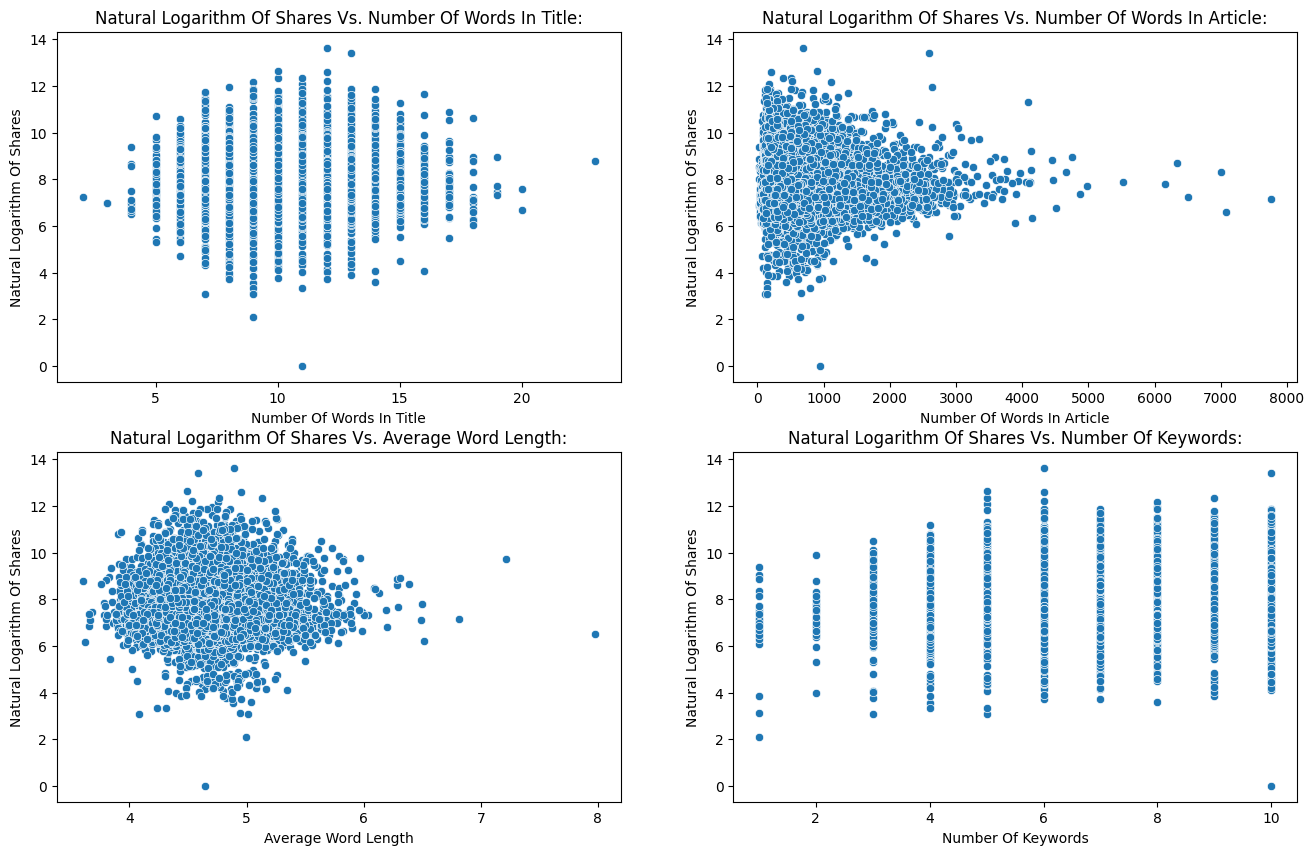

In [ ]:
# Determining the token and word feature names:
token_word_features = [" n_tokens_title", " n_tokens_content", " average_token_length", " num_keywords"]
token_word_names = ["Number Of Words In Title", "Number Of Words In Article", "Average Word Length", "Number Of Keywords"]

# Setting an array for the joint distributions of " ln_shares" with respect to each token or word feature:
fig, axs = plt.subplots(2, 2, figsize = (16, 10))
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Joint distributions of " ln_shares" with respect to each token or word feature:
for i in range(len(token_word_features)):
  sns.scatterplot(x = training_set[token_word_features[i]], y = training_set[" ln_shares"], ax = axs[positions[i]])
  axs[positions[i]].set(xlabel = f"{token_word_names[i]}", ylabel = "Natural Logarithm Of Shares", title = f"Natural Logarithm Of Shares Vs. {token_word_names[i]}:")
plt.show()

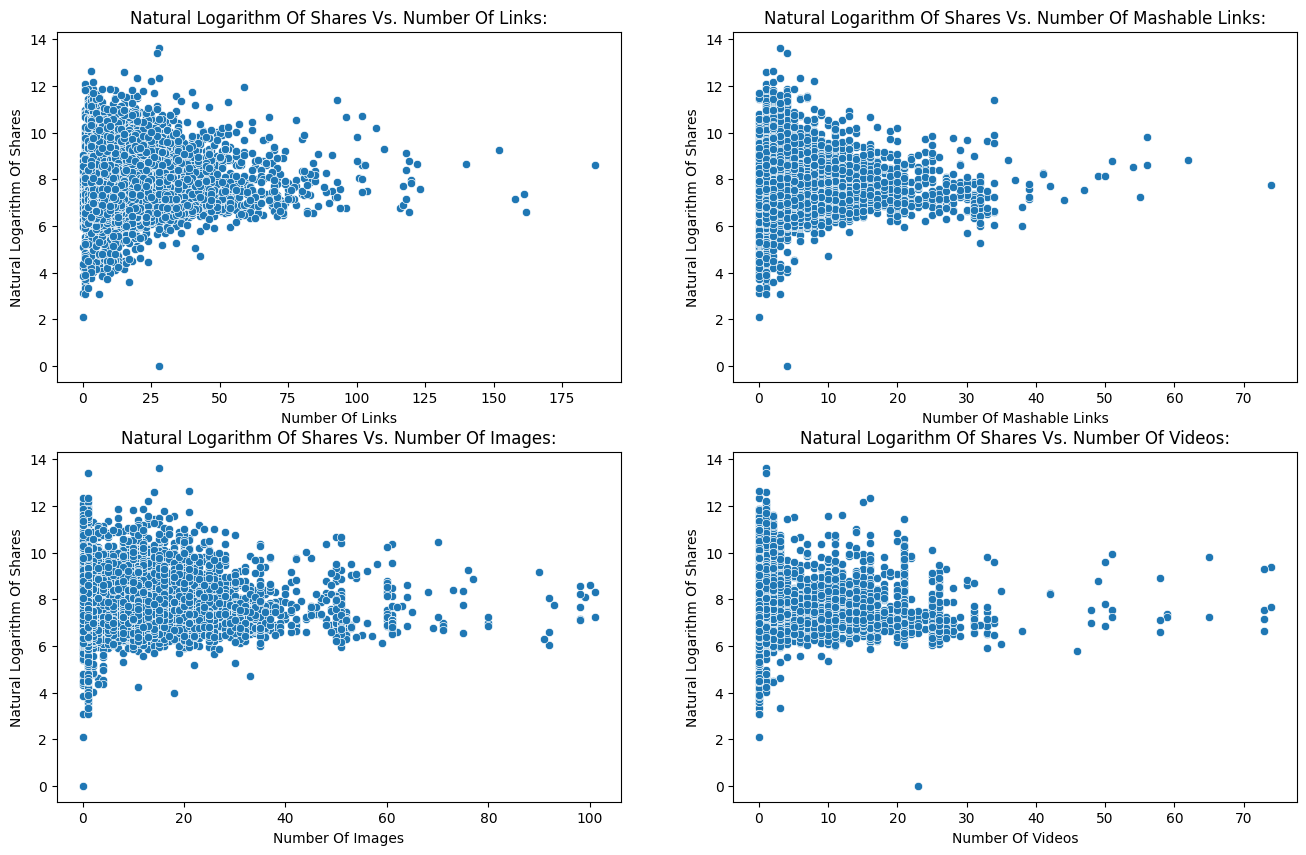

In [ ]:
# Determining the reference feature names:
reference_features = [" num_hrefs", " num_self_hrefs", " num_imgs", " num_videos"]
reference_names = ["Number Of Links", "Number Of Mashable Links", "Number Of Images", "Number Of Videos"]

# Setting an array for the joint distributions of " ln_shares" with respect to each reference feature:
fig, axs = plt.subplots(2, 2, figsize = (16, 10))
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Joint distributions of " ln_shares" with respect to each reference feature:
for i in range(len(reference_features)):
  sns.scatterplot(x = training_set[reference_features[i]], y = training_set[" ln_shares"], ax = axs[positions[i]])
  axs[positions[i]].set(xlabel = f"{reference_names[i]}", ylabel = "Natural Logarithm Of Shares", title = f"Natural Logarithm Of Shares Vs. {reference_names[i]}:")
plt.show()

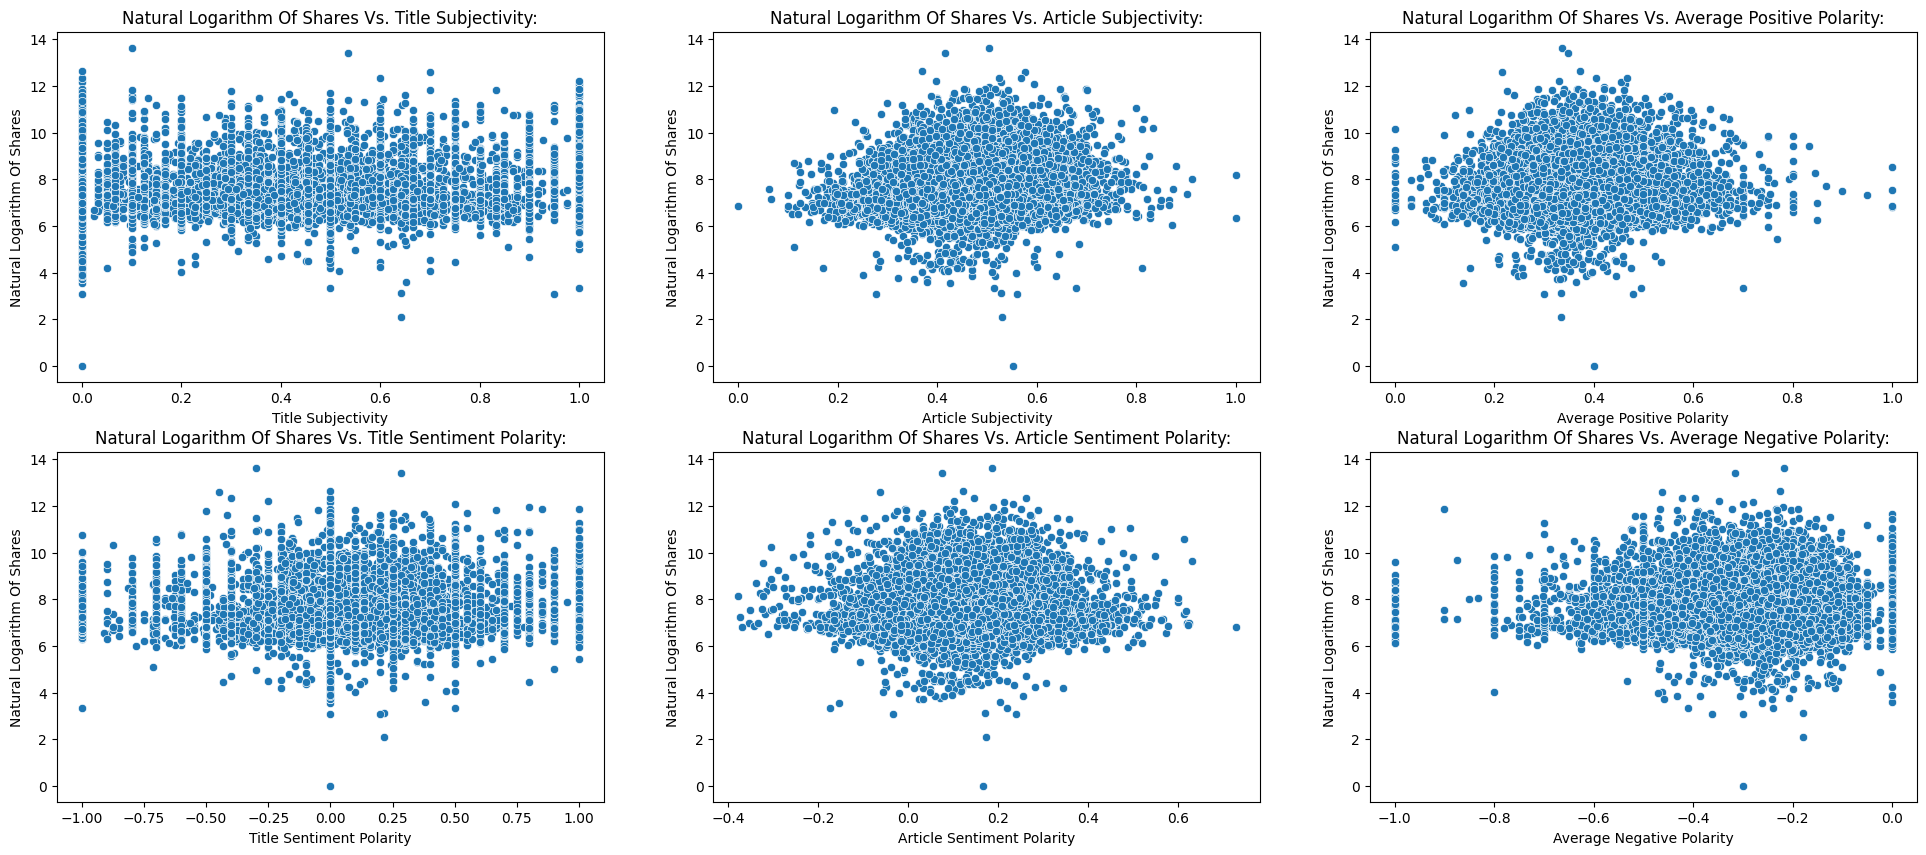

In [ ]:
# Determining the subjectivity and polarity features:
subjectivity_polarity_features = [" title_subjectivity", " global_subjectivity", " avg_positive_polarity", " title_sentiment_polarity", " global_sentiment_polarity", " avg_negative_polarity"]
subjectivity_polarity_names = ["Title Subjectivity", "Article Subjectivity", "Average Positive Polarity", "Title Sentiment Polarity", "Article Sentiment Polarity", "Average Negative Polarity"]

# Setting an array for the joint distributions of " ln_shares" with respect to each subjectivity and polarity feature:
fig, axs = plt.subplots(2, 3, figsize = (24, 10))
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

# Joint distributions of " ln_shares" with respect to each subjectivity and polarity feature:
for i in range(len(subjectivity_polarity_features)):
  sns.scatterplot(x = training_set[subjectivity_polarity_features[i]], y = training_set[" ln_shares"], ax = axs[positions[i]])
  axs[positions[i]].set(xlabel = f"{subjectivity_polarity_names[i]}", ylabel = "Natural Logarithm Of Shares", title = f"Natural Logarithm Of Shares Vs. {subjectivity_polarity_names[i]}:")
plt.show()

In [ ]:
# Applying the training set adjustments to the validation set:
X_val = X_val.drop(columns = keyword_features + self_reference_features + LDA_features + highly_correlated_features)

# Displaying the adjusted validation set:
validation_set = pd.concat([X_val, y_val], axis = 1)
validation_set

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,global_subjectivity,global_sentiment_polarity,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,ln_shares
11285,516.0,8.0,762.0,11.0,2.0,1.0,0.0,4.488189,10.0,0.0,...,0.0,1.0,0.0,0.515018,-0.024469,0.442420,-0.448667,0.666667,-0.7,7.600902
20924,318.0,12.0,889.0,20.0,20.0,22.0,0.0,4.752531,10.0,0.0,...,0.0,0.0,0.0,0.426973,0.149313,0.330449,-0.252381,0.000000,0.0,6.907755
26318,219.0,11.0,341.0,4.0,1.0,4.0,0.0,4.727273,4.0,0.0,...,0.0,0.0,0.0,0.336339,0.115068,0.181585,-0.163889,0.400000,0.2,7.696213
26526,216.0,11.0,220.0,4.0,2.0,1.0,1.0,4.527273,3.0,0.0,...,1.0,0.0,0.0,0.396296,0.116667,0.625000,-0.200000,0.000000,0.0,7.495542
21395,309.0,10.0,260.0,2.0,2.0,2.0,0.0,4.784615,4.0,0.0,...,0.0,0.0,0.0,0.497235,0.131174,0.359441,-0.147500,0.000000,0.0,7.003065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,276.0,13.0,1613.0,17.0,8.0,14.0,1.0,4.657781,6.0,0.0,...,0.0,0.0,0.0,0.472573,0.162756,0.483444,-0.294846,1.000000,0.0,6.907755
18987,356.0,9.0,694.0,8.0,5.0,1.0,1.0,4.566282,10.0,0.0,...,1.0,0.0,0.0,0.399203,0.089386,0.374160,-0.344318,0.000000,0.0,7.003065
1361,708.0,7.0,479.0,11.0,5.0,1.0,0.0,4.540710,4.0,0.0,...,0.0,0.0,0.0,0.311047,-0.008911,0.295065,-0.224630,0.000000,0.0,7.090077
10457,533.0,10.0,306.0,17.0,1.0,12.0,0.0,5.199346,7.0,0.0,...,0.0,0.0,0.0,0.615625,0.203977,0.389394,-0.500000,0.000000,0.0,8.433812


In [ ]:
# Applying the training set adjustments to the testing sets:
X_test = X_test.drop(columns = keyword_features + self_reference_features + LDA_features + highly_correlated_features)

# Displaying the adjusted testing set:
testing_set = pd.concat([X_test, y_test], axis = 1)
testing_set

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,global_subjectivity,global_sentiment_polarity,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,ln_shares
2866,681.0,13.0,986.0,6.0,4.0,0.0,16.0,4.397566,6.0,0.0,...,0.0,0.0,0.0,0.482631,0.182581,0.340266,-0.353704,0.000000,0.000000,7.824046
3828,665.0,10.0,240.0,6.0,3.0,1.0,0.0,5.179167,7.0,0.0,...,0.0,0.0,0.0,0.258366,0.103162,0.395455,0.000000,0.666667,0.000000,7.244228
31166,141.0,10.0,306.0,5.0,4.0,1.0,2.0,4.320261,6.0,0.0,...,0.0,0.0,0.0,0.403005,0.146193,0.415152,-0.207738,1.000000,0.000000,7.783224
26597,213.0,11.0,764.0,14.0,1.0,7.0,0.0,4.651832,7.0,0.0,...,0.0,0.0,0.0,0.463022,0.147400,0.423571,-0.326667,0.550000,0.100000,9.433484
37017,52.0,10.0,1074.0,44.0,9.0,15.0,0.0,4.951583,9.0,0.0,...,0.0,0.0,0.0,0.301878,0.089528,0.316672,-0.235494,0.000000,0.000000,6.804615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,715.0,10.0,548.0,6.0,0.0,1.0,0.0,4.520073,8.0,0.0,...,0.0,0.0,0.0,0.459978,0.134549,0.285765,-0.125000,0.500000,-0.500000,10.576432
11920,504.0,11.0,235.0,5.0,2.0,1.0,0.0,4.582979,8.0,1.0,...,0.0,0.0,0.0,0.459888,0.044458,0.324242,-0.237500,0.454545,0.136364,7.863267
22620,284.0,13.0,158.0,3.0,1.0,2.0,0.0,5.025316,10.0,0.0,...,0.0,0.0,1.0,0.570098,0.088971,0.354687,-0.220833,0.200000,-0.150000,7.377759
37429,46.0,12.0,994.0,10.0,10.0,7.0,0.0,4.502012,10.0,0.0,...,0.0,0.0,1.0,0.428597,0.214180,0.410532,-0.202500,0.433333,-0.166667,7.696213


In [ ]:
# Importing the dependencies:
from sklearn.preprocessing import StandardScaler

# Feature names of the numerical data in the training set:
numerical_features = [" timedelta", " n_tokens_title", " n_tokens_content", " num_hrefs", " num_self_hrefs", " num_imgs", " num_videos", " average_token_length", " num_keywords", " global_subjectivity", " global_sentiment_polarity", " avg_positive_polarity",
                      " avg_negative_polarity", " title_subjectivity", " title_sentiment_polarity"]
numerical_feature_columns = {}
for i in range(len(numerical_features)):
  numerical_feature_columns[i] = numerical_features[i]

# Categorical feature columns in the training set:
categorical_feature_columns = {}
for i in range(len(categorical_features)):
  categorical_feature_columns[i] = categorical_features[i]

# Initializing the scaler function:
scaler = StandardScaler()

# Separating the training set between the numerical and categorical data:
X_train_numerical = X_train[numerical_features]
X_train_categorical = X_train[categorical_features]

# Scaling the numerical data in the training set and converting it to a data frame:
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_train_numerical_scaled = pd.DataFrame(X_train_numerical_scaled)
X_train_numerical_scaled = X_train_numerical_scaled.rename(index = str, columns = numerical_feature_columns)

# Recombining the numerical and categorical data in the training set:
X_train_categorical = X_train_categorical.to_numpy()
X_train_categorical = pd.DataFrame(X_train_categorical)
X_train_categorical = X_train_categorical.rename(index = str, columns = categorical_feature_columns)
X_train_scaled = pd.concat([X_train_numerical_scaled, X_train_categorical], axis = 1)

# Displaying the final scaled training set:
y_train = y_train.to_numpy()
y_train = pd.DataFrame(y_train)
y_train = y_train.rename(index = str, columns = {0: " ln_shares"})
training_set_scaled = pd.concat([X_train_scaled, y_train], axis = 1)
training_set_scaled

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,global_subjectivity,...,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,ln_shares
0,-1.462018,1.234496,0.282668,0.797595,-0.363631,-0.194820,0.175159,-0.109611,-0.122945,-0.484740,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.768493
1,-0.154111,0.762179,-0.906296,-0.560493,-0.100397,-0.553545,0.175159,-1.053197,1.442568,1.379021,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.375025
2,-1.119806,0.762179,0.093466,0.073281,1.479007,-0.194820,-0.308007,0.443382,1.442568,0.182741,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.863267
3,0.258419,0.289863,0.734174,-0.560493,-0.890099,-0.433970,-0.308007,-1.192469,1.442568,0.007041,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.907755
4,0.220916,-0.182454,0.080566,0.163821,0.952539,-0.433970,-0.066424,-0.482091,-0.644782,0.120999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.244228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23068,0.249043,0.289863,1.157729,0.344899,-0.890099,-0.433970,-0.308007,0.437932,1.442568,-0.697503,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.024011
23069,1.730400,0.762179,-0.590243,-0.560493,-0.363631,-0.553545,-0.308007,-1.081917,-0.644782,-0.087241,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.626718
23070,0.642821,-0.182454,-0.392440,-0.832111,-0.626865,-0.433970,-0.066424,0.088646,-1.688457,-0.559311,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.831954
23071,0.445932,-0.654770,-0.876196,-0.741572,-0.626865,-0.433970,-0.308007,0.760378,-0.122945,-0.044607,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.630522


In [ ]:
# Separating the validation set between the numerical and categorical data:
X_val_numerical = X_val[numerical_features]
X_val_categorical = X_val[categorical_features]

# Scaling the numerical data in the validation set and converting it to a data frame:
X_val_numerical_scaled = scaler.transform(X_val_numerical)
X_val_numerical_scaled = pd.DataFrame(X_val_numerical_scaled)
X_val_numerical_scaled = X_val_numerical_scaled.rename(index = str, columns = numerical_feature_columns)

# Recombining the numerical and categorical data in the validation set:
X_val_categorical = X_val_categorical.to_numpy()
X_val_categorical = pd.DataFrame(X_val_categorical)
X_val_categorical = X_val_categorical.rename(index = str, columns = categorical_feature_columns)
X_val_scaled = pd.concat([X_val_numerical_scaled, X_val_categorical], axis = 1)

# Displaying the final scaled validation set:
y_val = y_val.to_numpy()
y_val = pd.DataFrame(y_val)
y_val = y_val.rename(index = str, columns = {0: " ln_shares"})
validation_set_scaled = pd.concat([X_val_scaled, y_val], axis = 1)
validation_set_scaled

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,global_subjectivity,...,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,ln_shares
0,0.727203,-1.127087,0.428870,-0.017258,-0.363631,-0.433970,-0.308007,-0.706432,1.442568,0.649788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.600902
1,-0.200989,0.762179,0.701923,0.797595,4.374580,2.077109,-0.308007,0.227797,1.442568,-0.346242,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.907755
2,-0.665085,0.289863,-0.476291,-0.651033,-0.626865,-0.075244,-0.308007,0.138530,-1.688457,-1.371573,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.696213
3,-0.679149,0.289863,-0.736444,-0.651033,-0.363631,-0.433970,-0.066424,-0.568303,-2.210295,-0.693284,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.495542
4,-0.243180,-0.182454,-0.650443,-0.832111,-0.363631,-0.314395,-0.308007,0.341189,-1.688457,0.448614,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.003065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,-0.397879,1.234496,2.258542,0.525978,1.215773,1.120508,-0.066424,-0.107067,-0.644782,0.169620,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.907755
7687,-0.022852,-0.654770,0.282668,-0.288876,0.426071,-0.433970,-0.066424,-0.430436,1.442568,-0.660404,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.003065
7688,1.627268,-1.599403,-0.179588,-0.017258,0.426071,-0.433970,-0.308007,-0.520814,-1.688457,-1.657687,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.090077
7689,0.806896,-0.182454,-0.551542,0.525978,-0.626865,0.881357,-0.308007,1.806917,-0.122945,1.787938,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.433812


In [ ]:
# Separating the testing set between the numerical and categorical data:
X_test_numerical = X_test[numerical_features]
X_test_categorical = X_test[categorical_features]

# Scaling the numerical data in the testing set and converting it to a data frame:
X_test_numerical_scaled = scaler.transform(X_test_numerical)
X_test_numerical_scaled = pd.DataFrame(X_test_numerical_scaled)
X_test_numerical_scaled = X_test_numerical_scaled.rename(index = str, columns = numerical_feature_columns)

# Recombining the numerical and categorical data in the testing set:
X_test_categorical = X_test_categorical.to_numpy()
X_test_categorical = pd.DataFrame(X_test_categorical)
X_test_categorical = X_test_categorical.rename(index = str, columns = categorical_feature_columns)
X_test_scaled = pd.concat([X_test_numerical_scaled, X_test_categorical], axis = 1)

# Displaying the final scaled testing set:
y_test = y_test.to_numpy()
y_test = pd.DataFrame(y_test)
y_test = y_test.rename(index = str, columns = {0: " ln_shares"})
testing_set_scaled = pd.concat([X_test_scaled, y_test], axis = 1)
testing_set_scaled

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,global_subjectivity,...,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,ln_shares
0,1.500696,1.234496,0.910476,-0.469954,0.162837,-0.553545,3.557316,-1.026708,-0.644782,0.283402,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.824046
1,1.425690,-0.182454,-0.693444,-0.469954,-0.100397,-0.433970,-0.308007,1.735598,-0.122945,-2.253659,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.244228
2,-1.030737,-0.182454,-0.551542,-0.560493,0.162837,-0.433970,0.175159,-1.299915,-0.644782,-0.617389,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.783224
3,-0.693213,0.289863,0.433170,0.254360,-0.626865,0.283481,-0.308007,-0.128088,-0.122945,0.061575,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.433484
4,-1.447955,-0.182454,1.099678,2.970538,1.479007,1.240083,-0.308007,0.931279,0.920730,-1.761421,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.804615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,1.660082,-0.182454,-0.031236,-0.469954,-0.890099,-0.433970,-0.308007,-0.593748,0.398893,0.027139,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.576432
7688,0.670948,0.289863,-0.704194,-0.560493,-0.363631,-0.433970,-0.308007,-0.371429,0.398893,0.026121,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.863267
7689,-0.360376,1.234496,-0.869746,-0.741572,-0.626865,-0.314395,-0.308007,1.191866,1.442568,1.272901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.377759
7690,-1.476082,0.762179,0.927676,-0.107797,1.742241,0.283481,-0.308007,-0.657578,1.442568,-0.327870,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.696213


Fitting 30 folds for each of 28 candidates, totalling 840 fits


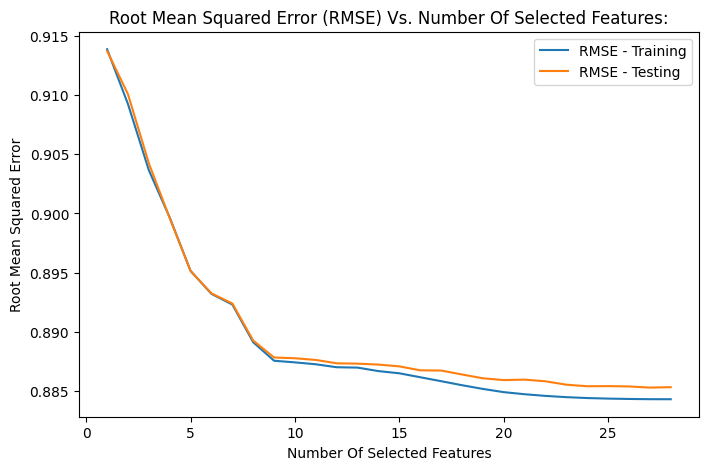

In [ ]:
# Importing the dependencies:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Repeated k-fold cross-validation parameter:
cross_validation = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# Training the multiple linear regression model with feature selection:
multiple_linear_regression_model = LinearRegression()
multiple_linear_regression_model.fit(X_train_scaled, y_train)
multiple_linear_regression_feature_selection = RFE(multiple_linear_regression_model)

# Hyperparameter tuning for number of features:
hyperparameters = [{"n_features_to_select": list(range(1, 29))}]

# Training the grid search cross-validation model:
grid_search_cross_validation = GridSearchCV(estimator = multiple_linear_regression_feature_selection, param_grid = hyperparameters, scoring = "neg_root_mean_squared_error", cv = cross_validation, verbose = 1, return_train_score = True)
grid_search_cross_validation.fit(X_train_scaled, y_train)

# Determining the results of the grid search cross-validation model:
grid_search_cross_validation_results = pd.DataFrame(grid_search_cross_validation.cv_results_)

# Displaying the root mean squared error against the number of features:
plt.figure(figsize = (8, 5))
plt.plot(grid_search_cross_validation_results["param_n_features_to_select"], -1 * grid_search_cross_validation_results["mean_train_score"])
plt.plot(grid_search_cross_validation_results["param_n_features_to_select"], -1 * grid_search_cross_validation_results["mean_test_score"])
plt.title("Root Mean Squared Error (RMSE) Vs. Number Of Selected Features:")
plt.xlabel("Number Of Selected Features")
plt.ylabel("Root Mean Squared Error")
plt.legend(["RMSE - Training", "RMSE - Testing"], loc = "upper right")
plt.show()

,RMSE,MSE,MAE,MAPE
Validation Set,0.899280,0.808704,0.660506,0.086735
Testing Set,0.873873,0.763655,0.654707,0.086347


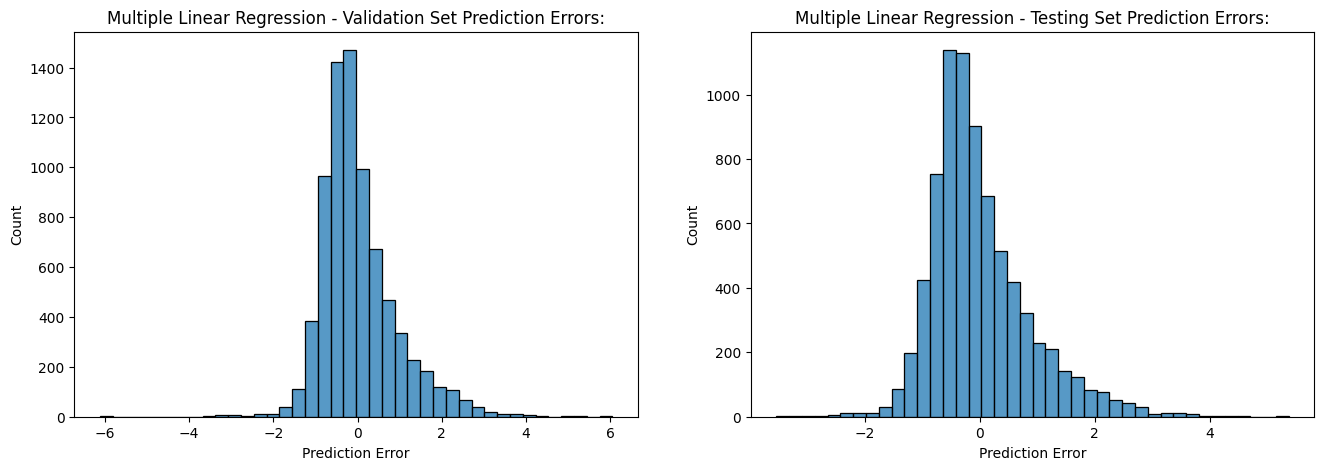

In [ ]:
# Importing the dependencies:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
import math

# Retraining the multiple linear regression model for the number of selected features:
multiple_linear_regression_model = LinearRegression()
multiple_linear_regression_model.fit(X_train_scaled, y_train)
multiple_linear_regression_feature_selection = RFE(multiple_linear_regression_model, n_features_to_select = 28)
multiple_linear_regression_feature_selection.fit(X_train_scaled, y_train)

# Passing the validation set into the multiple linear regression model and computing the performance metrics:
y_pred_val = multiple_linear_regression_model.predict(X_val_scaled)
RMSE_val = round(math.sqrt(mse(y_val, y_pred_val)), 6)
MSE_val = round(mse(y_val, y_pred_val), 6)
MAE_val = round(mae(y_val, y_pred_val), 6)
MAPE_val = round(mape(y_val, y_pred_val), 6)

# Passing the testing set into the multiple linear regression model and computing the performance metrics:
y_pred_test = multiple_linear_regression_model.predict(X_test_scaled)
RMSE_test = round(math.sqrt(mse(y_test, y_pred_test)), 6)
MSE_test = round(mse(y_test, y_pred_test), 6)
MAE_test = round(mae(y_test, y_pred_test), 6)
MAPE_test = round(mape(y_test, y_pred_test), 6)

# Determining the prediction errors for the validation set:
prediction_errors_validation_set = []
y_val = y_val[" ln_shares"].to_list()
y_pred_val = list(y_pred_val.reshape(7691, ))
for i in range(len(y_val)):
  prediction_errors_validation_set.append(y_val[i] - y_pred_val[i])

# Determining the prediction errors for the testing set:
prediction_errors_testing_set = []
y_test = y_test[" ln_shares"].to_list()
y_pred_test = list(y_pred_test.reshape(7692, ))
for i in range(len(y_test)):
  prediction_errors_testing_set.append(y_test[i] - y_pred_test[i])

# Displaying the performance metrics for the validation and testing sets as a data frame:
multiple_linear_regression_performance_metrics = {"RMSE": [RMSE_val, RMSE_test], "MSE": [MSE_val, MSE_test], "MAE": [MAE_val, MAE_test], "MAPE": [MAPE_val, MAPE_test]}
multiple_linear_regression_performance_metrics = pd.DataFrame(multiple_linear_regression_performance_metrics)
multiple_linear_regression_performance_metrics = multiple_linear_regression_performance_metrics.rename({0: "Validation Set", 1: "Testing Set"})
display(multiple_linear_regression_performance_metrics)
print("\n")

# Displaying the histograms of the prediction errors for the validation and testing sets:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns.histplot(prediction_errors_validation_set, bins = 40, ax = axs[0])
axs[0].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Multiple Linear Regression - Validation Set Prediction Errors:")
sns.histplot(prediction_errors_testing_set, bins = 40, ax = axs[1])
axs[1].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Multiple Linear Regression - Testing Set Prediction Errors:")
plt.show()

In [ ]:
# Determining the y-intercept and coefficients of the multiple linear regression model:
multiple_linear_regression_intercept = multiple_linear_regression_model.intercept_
multiple_linear_regression_coefficients = multiple_linear_regression_model.coef_
print(f"Multiple Linear Regression Model Summary:\n\nIntercept: {multiple_linear_regression_intercept}\nCoefficients: {multiple_linear_regression_coefficients}")

Multiple Linear Regression Model Summary:

Intercept: [7.76626854]
Coefficients: [[-0.00877476  0.00960486  0.01401004  0.06612582 -0.03348821  0.03466704
   0.00668425 -0.02183367  0.03225341  0.04910275  0.00067534 -0.00955776
  -0.01710516  0.01762748  0.01872107 -0.16820217 -0.44703808 -0.25423562
   0.0815437  -0.12845774 -0.49638715 -0.05033468 -0.10848759 -0.11172098
  -0.09279734 -0.03178596  0.21283006  0.18229649]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,RMSE,MSE,MAE,MAPE
Validation Set,0.899308,0.808755,0.660538,0.086740
Testing Set,0.873858,0.763628,0.654730,0.086351


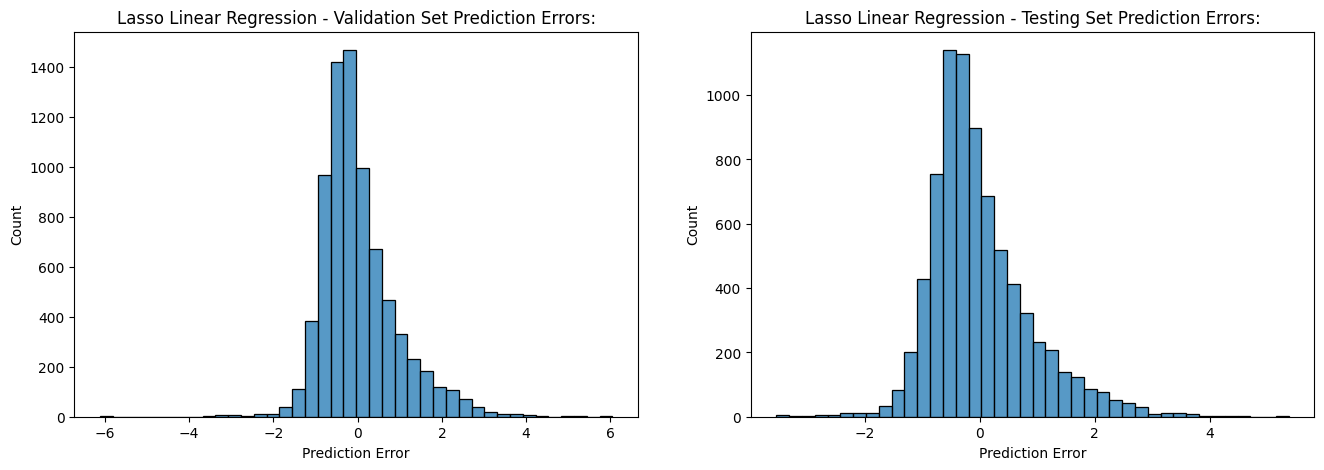

In [ ]:
# Importing the dependencies:
from sklearn.linear_model import LassoCV

# Training the lasso linear regression model with k-fold cross-validation:
lasso_linear_regression_model = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10], random_state = 100, cv = cross_validation)
lasso_linear_regression_model.fit(X_train_scaled, y_train)

# Passing the validation set into the lasso linear regression model and computing the performance metrics:
y_pred_val = lasso_linear_regression_model.predict(X_val_scaled)
RMSE_val = round(math.sqrt(mse(y_val, y_pred_val)), 6)
MSE_val = round(mse(y_val, y_pred_val), 6)
MAE_val = round(mae(y_val, y_pred_val), 6)
MAPE_val = round(mape(y_val, y_pred_val), 6)

# Passing the testing set into the lasso linear regression model and computing the performance metrics:
y_pred_test = lasso_linear_regression_model.predict(X_test_scaled)
RMSE_test = round(math.sqrt(mse(y_test, y_pred_test)), 6)
MSE_test = round(mse(y_test, y_pred_test), 6)
MAE_test = round(mae(y_test, y_pred_test), 6)
MAPE_test = round(mape(y_test, y_pred_test), 6)

# Determining the prediction errors for the validation set:
prediction_errors_validation_set = []
y_pred_val = list(y_pred_val.reshape(7691, ))
for i in range(len(y_val)):
  prediction_errors_validation_set.append(y_val[i] - y_pred_val[i])

# Determining the prediction errors for the testing set:
prediction_errors_testing_set = []
y_pred_test = list(y_pred_test.reshape(7692, ))
for i in range(len(y_test)):
  prediction_errors_testing_set.append(y_test[i] - y_pred_test[i])

# Displaying the performance metrics for the validation and testing sets as a data frame:
lasso_linear_regression_performance_metrics = {"RMSE": [RMSE_val, RMSE_test], "MSE": [MSE_val, MSE_test], "MAE": [MAE_val, MAE_test], "MAPE": [MAPE_val, MAPE_test]}
lasso_linear_regression_performance_metrics = pd.DataFrame(lasso_linear_regression_performance_metrics)
lasso_linear_regression_performance_metrics = lasso_linear_regression_performance_metrics.rename({0: "Validation Set", 1: "Testing Set"})
display(lasso_linear_regression_performance_metrics)
print("\n")

# Displaying the histograms of the prediction errors for the validation and testing sets:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns.histplot(prediction_errors_validation_set, bins = 40, ax = axs[0])
axs[0].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Lasso Linear Regression - Validation Set Prediction Errors:")
sns.histplot(prediction_errors_testing_set, bins = 40, ax = axs[1])
axs[1].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Lasso Linear Regression - Testing Set Prediction Errors:")
plt.show()

In [ ]:
# Determining the y-intercept and coefficients of the lasso linear regression model:
lasso_linear_regression_intercept = lasso_linear_regression_model.intercept_
lasso_linear_regression_coefficients = lasso_linear_regression_model.coef_
print(f"Lasso Linear Regression Model Summary:\n\nIntercept: {lasso_linear_regression_intercept}\nCoefficients: {lasso_linear_regression_coefficients}")

Lasso Linear Regression Model Summary:

Intercept: 7.712426042456934
Coefficients: [-8.61055576e-03  9.49525212e-03  1.35213121e-02  6.62521236e-02
 -3.32777731e-02  3.49000969e-02  6.78694930e-03 -2.17078970e-02
  3.21564398e-02  4.93328766e-02  3.07731717e-04 -9.08561269e-03
 -1.70314789e-02  1.76487324e-02  1.86907240e-02 -1.62703605e-01
 -4.43084334e-01 -2.50015167e-01  8.33456730e-02 -1.24366865e-01
 -4.92171867e-01 -0.00000000e+00 -5.75418790e-02 -6.08580188e-02
 -4.18512335e-02  1.78817443e-02  2.61664620e-01  2.31394293e-01]


,RMSE,MSE,MAE,MAPE
Validation Set,0.899325,0.808785,0.660554,0.086742
Testing Set,0.873843,0.763602,0.654725,0.086350


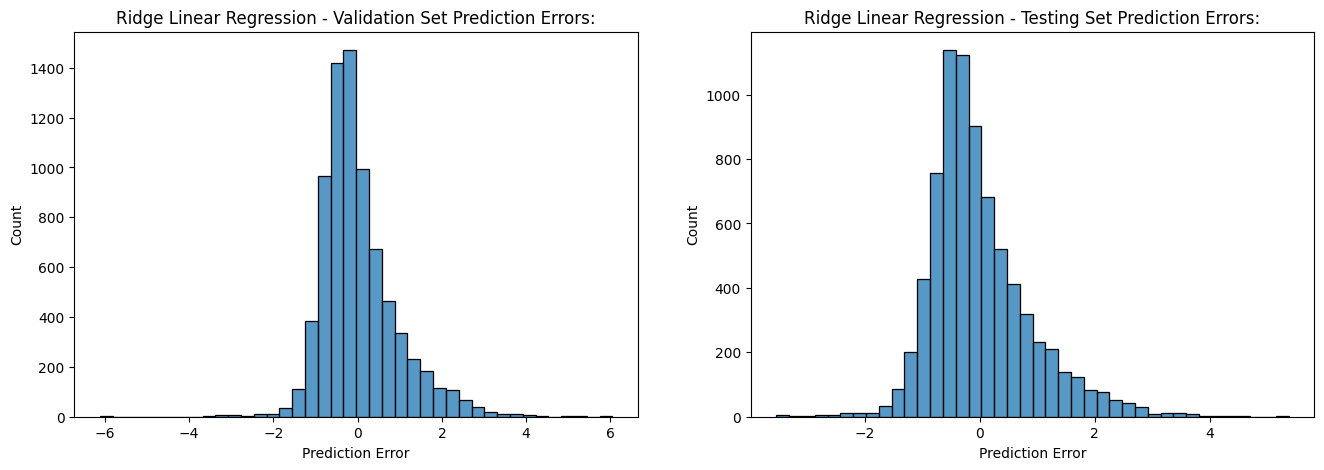

In [ ]:
# Importing the dependencies:
from sklearn.linear_model import RidgeCV

# Training the ridge linear regression model with k-fold cross-validation:
ridge_linear_regression_model = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10], cv = cross_validation, scoring = "neg_root_mean_squared_error")
ridge_linear_regression_model.fit(X_train_scaled, y_train)

# Passing the validation set into the ridge linear regression model and computing the performance metrics:
y_pred_val = ridge_linear_regression_model.predict(X_val_scaled)
RMSE_val = round(math.sqrt(mse(y_val, y_pred_val)), 6)
MSE_val = round(mse(y_val, y_pred_val), 6)
MAE_val = round(mae(y_val, y_pred_val), 6)
MAPE_val = round(mape(y_val, y_pred_val), 6)

# Passing the testing set into the ridge linear regression model and computing the performance metrics:
y_pred_test = ridge_linear_regression_model.predict(X_test_scaled)
RMSE_test = round(math.sqrt(mse(y_test, y_pred_test)), 6)
MSE_test = round(mse(y_test, y_pred_test), 6)
MAE_test = round(mae(y_test, y_pred_test), 6)
MAPE_test = round(mape(y_test, y_pred_test), 6)

# Determining the prediction errors for the validation set:
prediction_errors_validation_set = []
y_pred_val = list(y_pred_val.reshape(7691, ))
for i in range(len(y_val)):
  prediction_errors_validation_set.append(y_val[i] - y_pred_val[i])

# Determining the prediction errors for the testing set:
prediction_errors_testing_set = []
y_pred_test = list(y_pred_test.reshape(7692, ))
for i in range(len(y_test)):
  prediction_errors_testing_set.append(y_test[i] - y_pred_test[i])

# Displaying the performance metrics for the validation and testing sets as a data frame:
ridge_linear_regression_performance_metrics = {"RMSE": [RMSE_val, RMSE_test], "MSE": [MSE_val, MSE_test], "MAE": [MAE_val, MAE_test], "MAPE": [MAPE_val, MAPE_test]}
ridge_linear_regression_performance_metrics = pd.DataFrame(ridge_linear_regression_performance_metrics)
ridge_linear_regression_performance_metrics = ridge_linear_regression_performance_metrics.rename({0: "Validation Set", 1: "Testing Set"})
display(ridge_linear_regression_performance_metrics)
print("\n")

# Displaying the histograms of the prediction errors for the validation and testing sets:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns.histplot(prediction_errors_validation_set, bins = 40, ax = axs[0])
axs[0].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Ridge Linear Regression - Validation Set Prediction Errors:")
sns.histplot(prediction_errors_testing_set, bins = 40, ax = axs[1])
axs[1].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Ridge Linear Regression - Testing Set Prediction Errors:")
plt.show()

In [ ]:
# Determining the y-intercept and coefficients of the ridge linear regression model:
ridge_linear_regression_intercept = ridge_linear_regression_model.intercept_
ridge_linear_regression_coefficients = ridge_linear_regression_model.coef_
print(f"Ridge Linear Regression Model Summary:\n\nIntercept: {ridge_linear_regression_intercept}\nCoefficients: {ridge_linear_regression_coefficients}")

Ridge Linear Regression Model Summary:

Intercept: [7.76067755]
Coefficients: [[-0.00864125  0.0095345   0.0133074   0.06642578 -0.03349256  0.03521666
   0.00700782 -0.02188597  0.03233011  0.04951831  0.00061743 -0.00931906
  -0.0172222   0.01773351  0.01873868 -0.16159531 -0.44080807 -0.24781219
   0.08636899 -0.12265139 -0.48939294 -0.05012482 -0.10799218 -0.11127176
  -0.09234797 -0.03148142  0.21163119  0.18158696]]


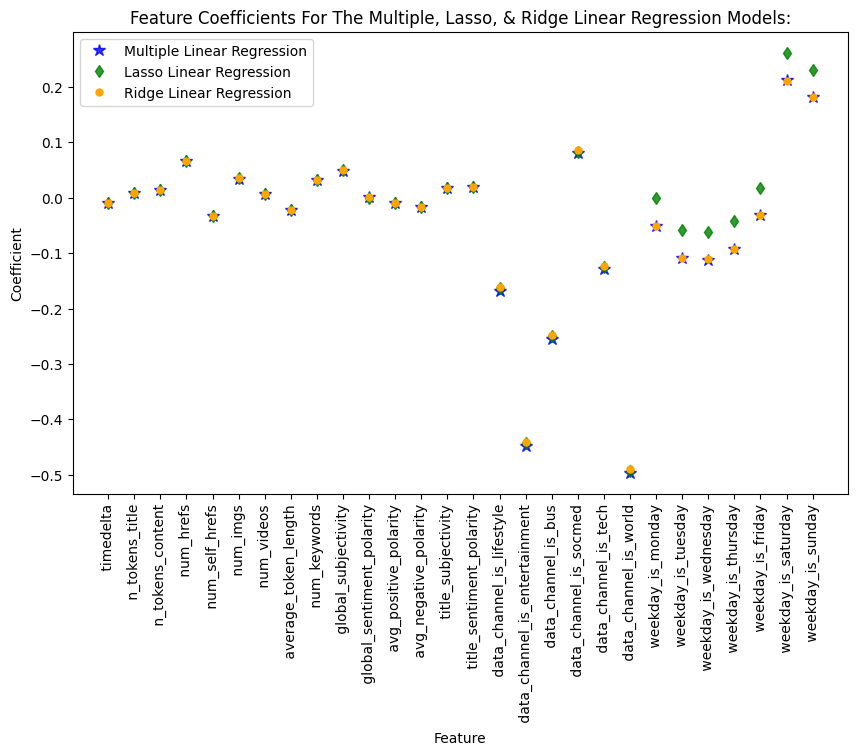

In [ ]:
# Determining the coefficients of the features for the multiple, lasso, and ridge linear regression models:
multiple_linear_regression_coefficients = multiple_linear_regression_model.coef_.reshape(28, )
lasso_linear_regression_coefficients = lasso_linear_regression_model.coef_.reshape(28, )
ridge_linear_regression_coefficients = ridge_linear_regression_model.coef_.reshape(28, )

# Converting the coefficients of the features for the multiple, lasso, and ridge linear regression models to a data frame:
linear_regression_models_coefficients = {"Multiple Linear Regression": multiple_linear_regression_coefficients, "Lasso Linear Regression": lasso_linear_regression_coefficients, "Ridge Linear Regression": ridge_linear_regression_coefficients}
linear_regression_models_coefficients = pd.DataFrame(linear_regression_models_coefficients)

# Plotting the coefficients of the features for the multiple, lasso, and ridge linear regression models:
plt.figure(figsize = (10, 6))
plt.plot(X_train_scaled.columns, multiple_linear_regression_coefficients, alpha = 0.8, linestyle = "none", marker = "*", markersize = 9, color = "blue", label = r"Multiple Linear Regression")
plt.plot(X_train_scaled.columns, lasso_linear_regression_coefficients, alpha = 0.8, linestyle = "none", marker = "d", markersize = 6, color = "green", label = r"Lasso Linear Regression")
plt.plot(X_train_scaled.columns, ridge_linear_regression_coefficients, alpha = 1.0, linestyle = "none", marker = "o", markersize = 5, color = "orange", label = r"Ridge Linear Regression")
plt.xticks(rotation = 90)
plt.title("Feature Coefficients For The Multiple, Lasso, & Ridge Linear Regression Models:")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

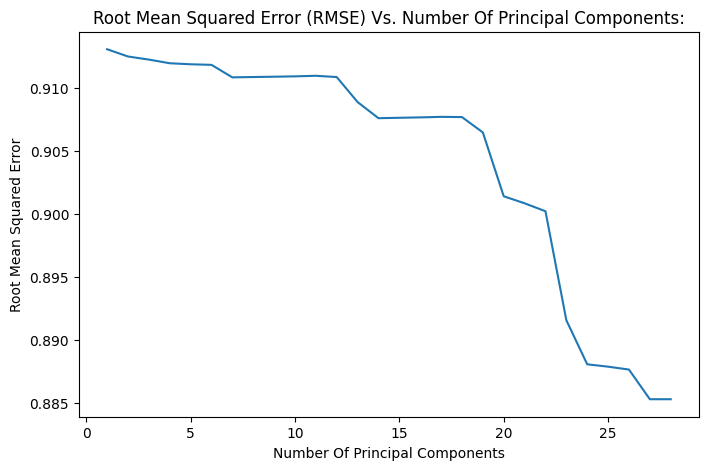

In [ ]:
# Principal component analysis (PCA) linear regression model:

# Importing the dependencies:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Training the principal component analysis (PCA) linear regression model with different numbers of principal components:
RMSE_PCA = []
for i in range(1, 29):
  principal_component_analysis_model = PCA(n_components = i)
  X_train_scaled_pca = principal_component_analysis_model.fit_transform(X_train_scaled)
  multiple_linear_regression_model = LinearRegression()
  RMSE = -1 * cross_val_score(multiple_linear_regression_model, X_train_scaled_pca, y_train, cv = cross_validation, scoring = "neg_root_mean_squared_error", verbose = 1).mean()
  RMSE_PCA.append(RMSE)

# Plotting the root mean squared errors with respect to the number of principal components:
plt.figure(figsize = (8, 5))
plt.plot(list(range(1, 29)), RMSE_PCA)
plt.title("Root Mean Squared Error (RMSE) Vs. Number Of Principal Components:")
plt.xlabel("Number Of Principal Components")
plt.ylabel("Root Mean Squared Error")
plt.show()

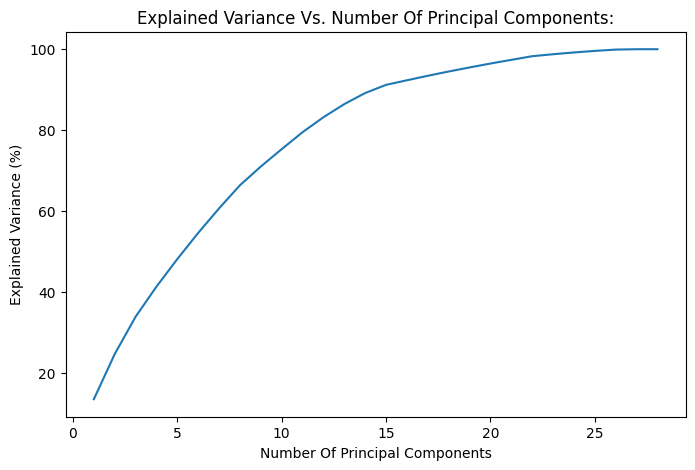

In [ ]:
# Determining the explained variance in the target variable " ln_shares" with respect to the number of principal components:
principal_component_analysis_model = PCA()
X_train_scaled_pca = principal_component_analysis_model.fit_transform(X_train_scaled)
ln_shares_explained_variance = np.cumsum(principal_component_analysis_model.explained_variance_ratio_ * 100)
ln_shares_explained_variance = list(ln_shares_explained_variance)

# Plotting the explained variance with respect to the number of principal components:
plt.figure(figsize = (8, 5))
plt.plot(list(range(1, 29)), ln_shares_explained_variance)
plt.title("Explained Variance Vs. Number Of Principal Components:")
plt.xlabel("Number Of Principal Components")
plt.ylabel("Explained Variance (%)")
plt.show()

In [ ]:
# Determining the optimal number of principal components:
explained_variance_list = []
for i in range(len(ln_shares_explained_variance)):
  if ln_shares_explained_variance[i] <= 90:
    explained_variance_list.append(ln_shares_explained_variance[i])
print(f"Number Of Principal Components = {len(explained_variance_list)}")

Number Of Principal Components = 14


In [ ]:
ln_shares_explained_variance

[13.605152819986612,
 24.751548922261705,
 33.96247995867507,
 41.400703390445045,
 48.21038189351608,
 54.66460211268745,
 60.718984623007046,
 66.42465009125533,
 71.04635415280887,
 75.34118383625663,
 79.5268696838079,
 83.21037428182312,
 86.46277304097643,
 89.18777870950558,
 91.20703830908823,
 92.33612161003406,
 93.44987340643091,
 94.50196892990098,
 95.50259812462193,
 96.46984042941654,
 97.37834802234039,
 98.2755602346562,
 98.76375008025686,
 99.2016730894483,
 99.58712757303404,
 99.90955441966376,
 100.00000000000003,
 100.00000000000003]

,RMSE,MSE,MAE,MAPE
Validation Set,0.921203,0.848614,0.684915,0.090172
Testing Set,0.891678,0.795090,0.676192,0.089411


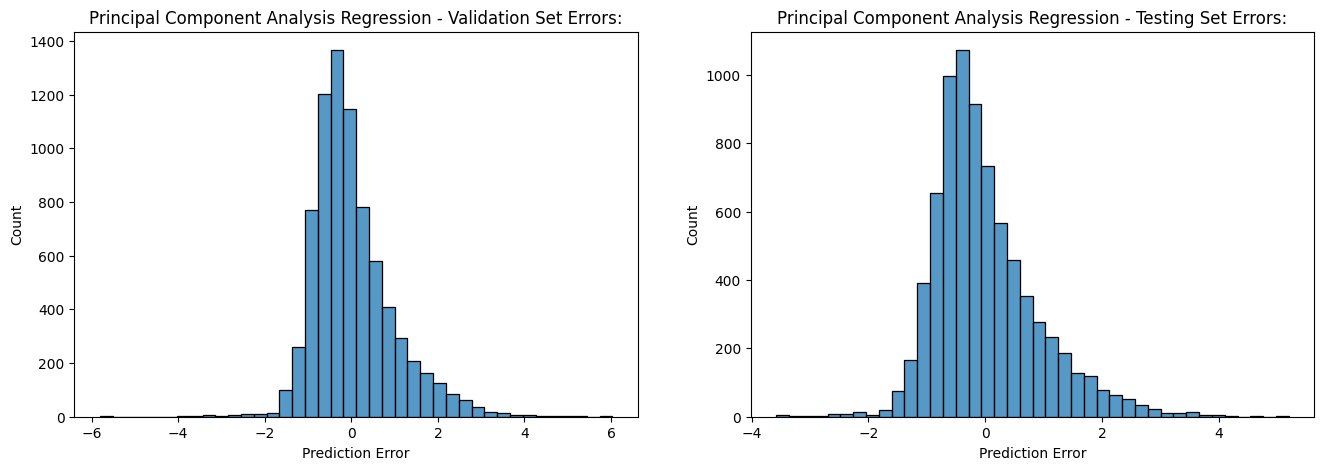

In [ ]:
# Retraining the principal component analysis (PCA) linear regression model with 14 principal components:
principal_component_analysis_model = PCA(n_components = 14)
X_train_scaled_pca = principal_component_analysis_model.fit_transform(X_train_scaled)
multiple_linear_regression_model = LinearRegression()
multiple_linear_regression_model.fit(X_train_scaled_pca, y_train)

# Passing the validation set into the principal component analysis (PCA) linear regression model with 14 principal components:
X_val_scaled_pca = principal_component_analysis_model.transform(X_val_scaled)
y_pred_val = multiple_linear_regression_model.predict(X_val_scaled_pca)
RMSE_val = round(math.sqrt(mse(y_val, y_pred_val)), 6)
MSE_val = round(mse(y_val, y_pred_val), 6)
MAE_val = round(mae(y_val, y_pred_val), 6)
MAPE_val = round(mape(y_val, y_pred_val), 6)

# Passing the testing set into the principal component analysis (PCA) linear regression model with 14 principal components:
X_test_scaled_pca = principal_component_analysis_model.transform(X_test_scaled)
y_pred_test = multiple_linear_regression_model.predict(X_test_scaled_pca)
RMSE_test = round(math.sqrt(mse(y_test, y_pred_test)), 6)
MSE_test = round(mse(y_test, y_pred_test), 6)
MAE_test = round(mae(y_test, y_pred_test), 6)
MAPE_test = round(mape(y_test, y_pred_test), 6)

# Determining the prediction errors for the validation set:
prediction_errors_validation_set = []
y_pred_val = list(y_pred_val.reshape(7691, ))
for i in range(len(y_val)):
  prediction_errors_validation_set.append(y_val[i] - y_pred_val[i])

# Determining the prediction errors for the testing set:
prediction_errors_testing_set = []
y_pred_test = list(y_pred_test.reshape(7692, ))
for i in range(len(y_test)):
  prediction_errors_testing_set.append(y_test[i] - y_pred_test[i])

# Displaying the performance metrics for the validation and testing sets as a data frame:
principal_component_analysis_performance_metrics = {"RMSE": [RMSE_val, RMSE_test], "MSE": [MSE_val, MSE_test], "MAE": [MAE_val, MAE_test], "MAPE": [MAPE_val, MAPE_test]}
principal_component_analysis_performance_metrics = pd.DataFrame(principal_component_analysis_performance_metrics)
principal_component_analysis_performance_metrics = principal_component_analysis_performance_metrics.rename({0: "Validation Set", 1: "Testing Set"})
display(principal_component_analysis_performance_metrics)
print("\n")

# Displaying the histograms of the prediction errors for the validation and testing sets:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns.histplot(prediction_errors_validation_set, bins = 40, ax = axs[0])
axs[0].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Principal Component Analysis Regression - Validation Set Errors:")
sns.histplot(prediction_errors_testing_set, bins = 40, ax = axs[1])
axs[1].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Principal Component Analysis Regression - Testing Set Errors:")
plt.show()

In [ ]:
# Determining the y-intercept and coefficients of the principal component analysis linear regression model:
principal_component_analysis_intercept = multiple_linear_regression_model.intercept_
principal_component_analysis_coefficients = multiple_linear_regression_model.coef_
print(f"Principal Component Analysis (PCA) Linear Regression Model Summary:\n\nIntercept: {principal_component_analysis_intercept}\nCoefficients: {principal_component_analysis_coefficients}")

Principal Component Analysis (PCA) Linear Regression Model Summary:

Intercept: [7.46671153]
Coefficients: [[ 0.09915628 -0.02455164  0.01936261 -0.02319111  0.01383329  0.01477738
  -0.04337357  0.00555773 -0.00542746  0.00019624 -0.00442112 -0.01954364
  -0.08289766  0.07287803]]


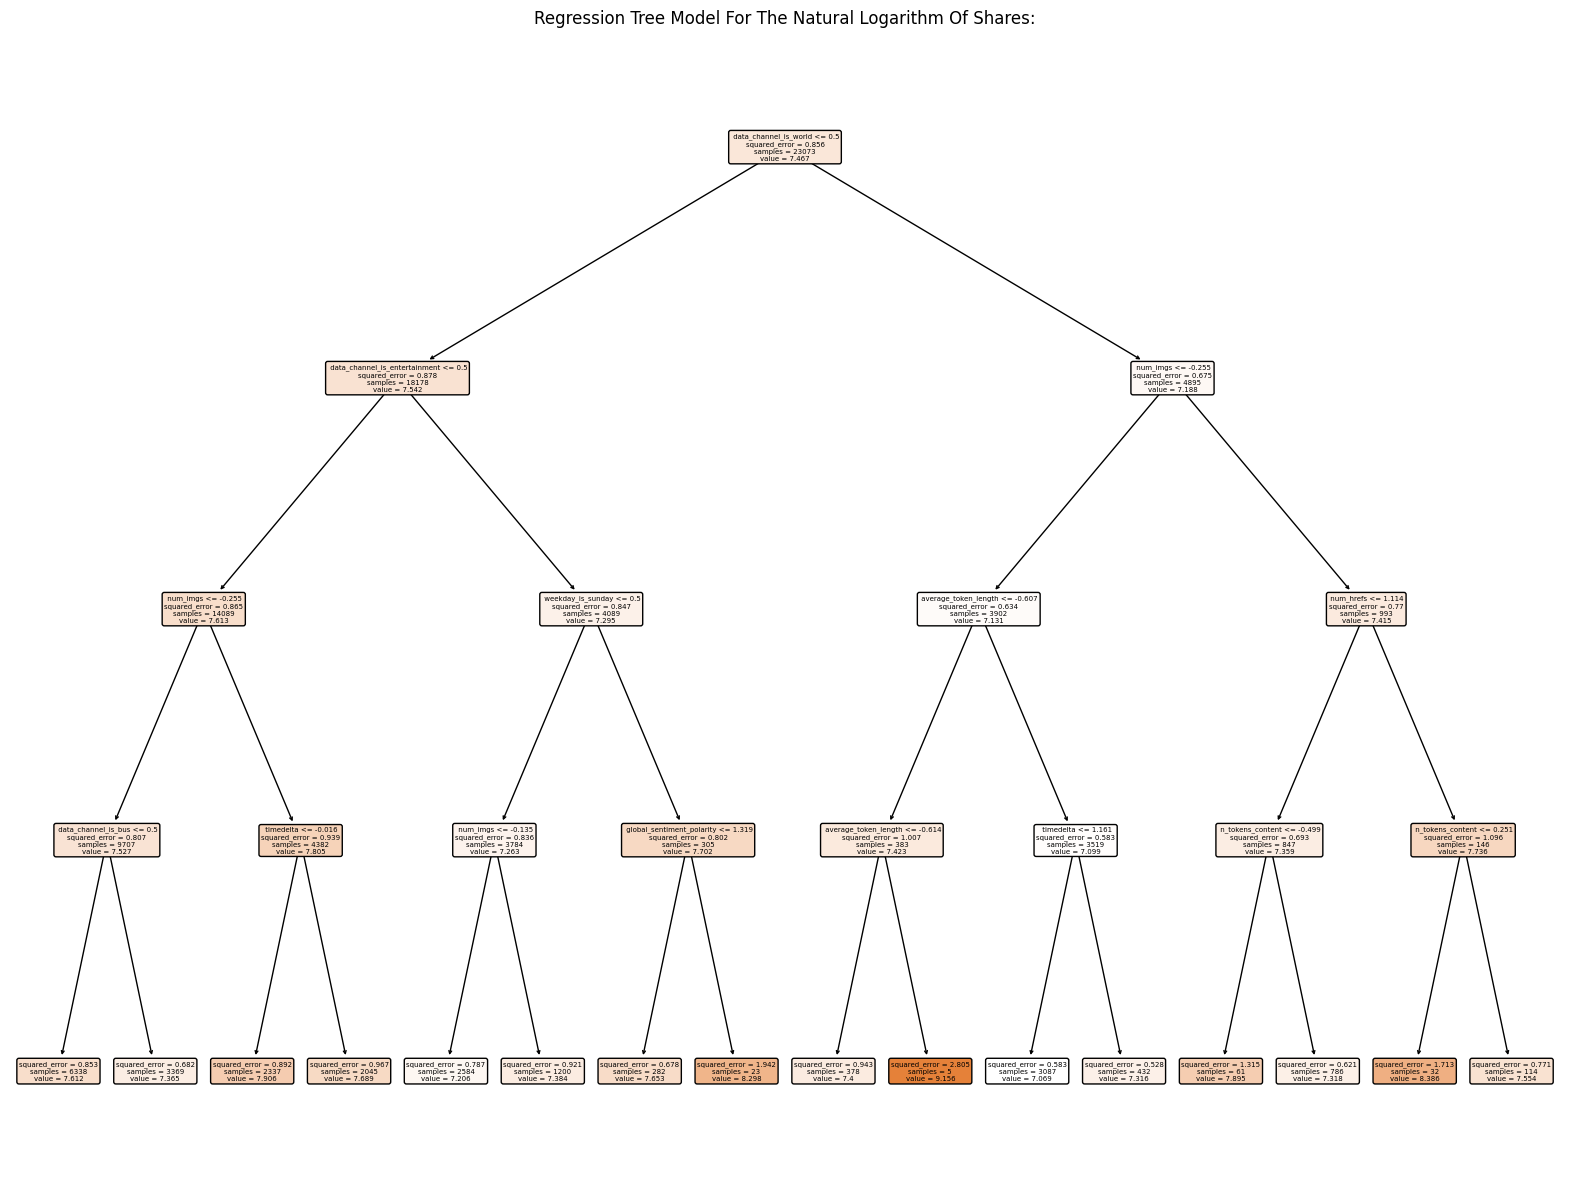

In [ ]:
# Importing the dependencies:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Building a regression tree model on the training set:
regression_tree = tree.DecisionTreeRegressor(max_depth = 4, random_state = 100)
regression_tree = regression_tree.fit(X_train_scaled, y_train)

# Displaying the regression tree model for the training set:
plt.figure(figsize = (20, 15))
tree.plot_tree(regression_tree, feature_names = X_train_scaled.columns, filled = True, rounded = True, fontsize = 5)
plt.title("Regression Tree Model For The Natural Logarithm Of Shares:")
plt.show()

,RMSE,MSE,MAE,MAPE
Validation Set,0.908574,0.825506,0.668887,0.087855
Testing Set,0.885044,0.783303,0.665067,0.087807


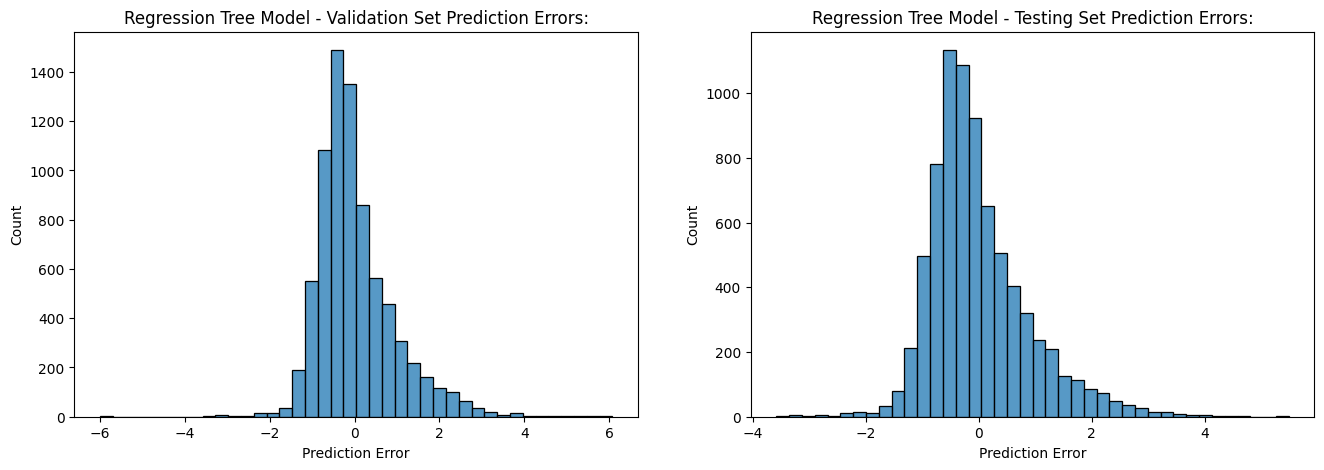

In [ ]:
# Passing the validation set into the regression tree model and computing the performance metrics:
y_pred_val = regression_tree.predict(X_val_scaled)
RMSE_val = round(math.sqrt(mse(y_val, y_pred_val)), 6)
MSE_val = round(mse(y_val, y_pred_val), 6)
MAE_val = round(mae(y_val, y_pred_val), 6)
MAPE_val = round(mape(y_val, y_pred_val), 6)

# Passing the testing set into the regression tree model and computing the performance metrics:
y_pred_test = regression_tree.predict(X_test_scaled)
RMSE_test = round(math.sqrt(mse(y_test, y_pred_test)), 6)
MSE_test = round(mse(y_test, y_pred_test), 6)
MAE_test = round(mae(y_test, y_pred_test), 6)
MAPE_test = round(mape(y_test, y_pred_test), 6)

# Determining the prediction errors for the validation set:
prediction_errors_validation_set = []
y_pred_val = list(y_pred_val.reshape(7691, ))
for i in range(len(y_val)):
  prediction_errors_validation_set.append(y_val[i] - y_pred_val[i])

# Determining the prediction errors for the testing set:
prediction_errors_testing_set = []
y_pred_test = list(y_pred_test.reshape(7692, ))
for i in range(len(y_test)):
  prediction_errors_testing_set.append(y_test[i] - y_pred_test[i])

# Displaying the performance metrics for the validation and testing sets as a data frame:
regression_tree_performance_metrics = {"RMSE": [RMSE_val, RMSE_test], "MSE": [MSE_val, MSE_test], "MAE": [MAE_val, MAE_test], "MAPE": [MAPE_val, MAPE_test]}
regression_tree_performance_metrics = pd.DataFrame(regression_tree_performance_metrics)
regression_tree_performance_metrics = regression_tree_performance_metrics.rename({0: "Validation Set", 1: "Testing Set"})
display(regression_tree_performance_metrics)
print("\n")

# Displaying the histograms of the prediction errors for the validation and testing sets:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns.histplot(prediction_errors_validation_set, bins = 40, ax = axs[0])
axs[0].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Regression Tree Model - Validation Set Prediction Errors:")
sns.histplot(prediction_errors_testing_set, bins = 40, ax = axs[1])
axs[1].set(xlabel = "Prediction Error", ylabel = "Count", title = f"Regression Tree Model - Testing Set Prediction Errors:")
plt.show()